# Случайные леса
---

## В чём состоит улучшение

Вспомним процесс создания одного дерева решений:

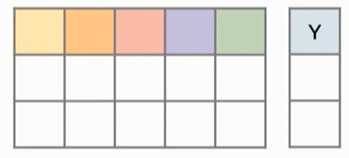

У нас есть несколько признаков и целевая переменная. 

Если строится одно дерево решений, то в большинстве случаев это делается на основе метрики "gini impurity". При построении дерева, может случиться так, что будут использоваться только отдельные признаки. Наилучшее дерево строится с помощью только отдельных признаков:

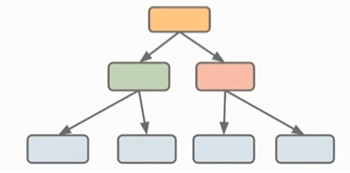

**Почему это может быть не очень хорошо?**  
В таком случае теряется возможность получать информацию из всех признаков, так как берутся только самые важные признаки, но теряется возможность извлечь дополнительную информацию из менее важных признаков, которые потенциально могли бы ещё больше улучшить точность модели.

Ещё один момент - когда мы строим дерево и даже меняем различные гиперпараметры, то в корневом узле, как правило, будет находиться один и тот же признак:

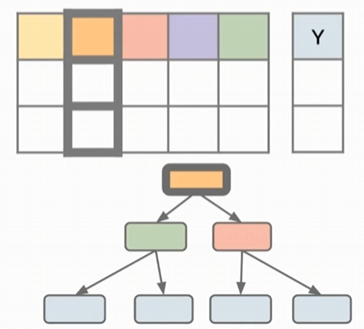

Признак в корневом узле имеет большое влияние на дерево в целом, потому что все данные, которые поступают на вход дерева будут сначала разбиваться в корневом узле, а только затем разбиваться по другим признакам в других узлах.

Хоть в корневом и находится признак, который лучше всего разбивает данные, но потенциальная проблема состоит в том, что если взглянуть на весь список признаков, то получается так - что одним признакам даётся слишком большой вес, а другим - либо слишком маленький вес, либо нулевой.

Что можно поменять в таком случае:
* Критерии разбиения в узлах
* Минимальное уменьшение метрики Gini Impurity
* Установить лимиты на глубину дерева
* Установить лимиты на количество листовых узлов

**Но когда мы фиксируем какую-то комбинацию гиперпараметров, то мы получаем только одно дерево решений, которое мы строим в соответствии с правилами построения деревьев.**

Даже после оптимизации гиперпараметрова, деревья решений ограничены:
* Только один признак в корневом узле
* В разбиении могут использоваться не все признаки
* Возможно переобучение

**Создаём поднаборы случайно выбранных признаков.**
1. Начинаем с полного набора признаков:

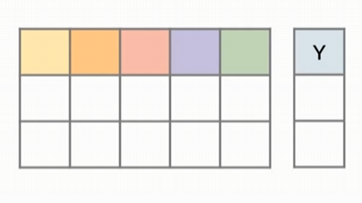

2. Далее выбираем некоторое число N случайных признаков:

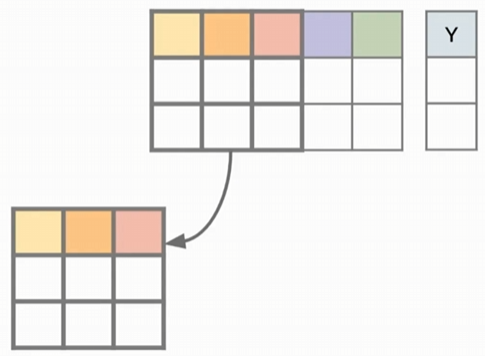

3. Строим первое разбиение данных данных, на основе только этих трёх признаков:

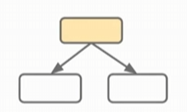

Можно заметить, что такой подход решает потенциальную проблему того, что раньше в корневом узле всегда был один и тот же признак. Здесь же берутся отдельные признаки, поэтому признак для корневого узла будет выбираться только из этих трёх признаков. Допустим, на основе метрики "gini impurity", для данного примера выбран жёлтый признак для корневого разбиения.

Если в каком-то из дальнейших узлов, становится понятно, что необходимо опять выполнять разбиение данных - то мы берём уже другой случайный набор из трёх признаков:

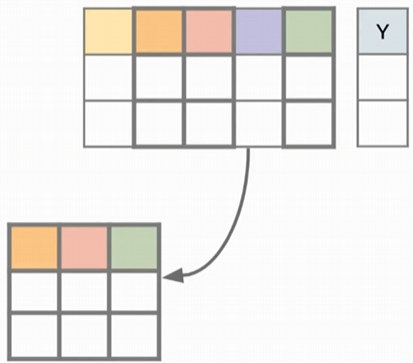

И уже из этих трёх признаков выбирается, на основе метрики "gini impurity", какой из этих трёх признаков лучше всего выбрать для разбиения данных:

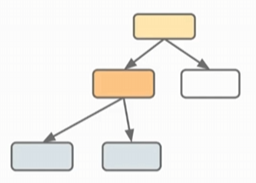

Допустим, здесь у нас будет оранжевый признак и метрика говорит о том, что дальнейшее разбиение можно не делать, так как оно не приведёт к заметному уменьшению "gini impurity". Соответственно, дальше мы размещаем листовые узлы.

Таким образом была построена левая ветка дерева, если же необходимо построить ещё и правую ветку, то алгоритм повторяется уже для другого набора случайных признаков.

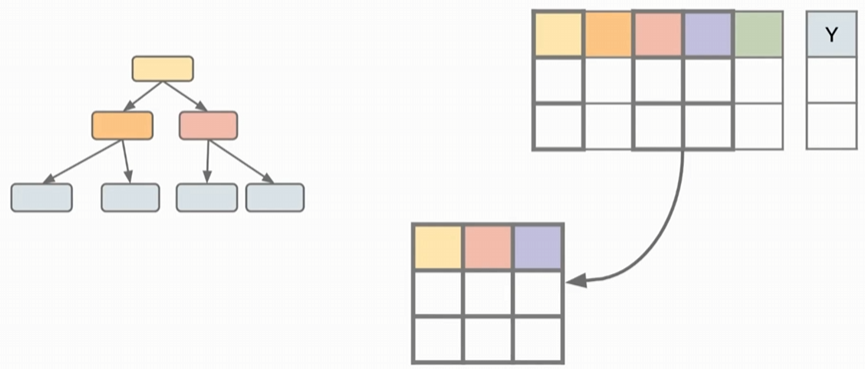

По окночанию, мы получаем дерево, которое *скорее всего* не будет переобучено. А также получаем возможность исследовать различные аспекты данных:

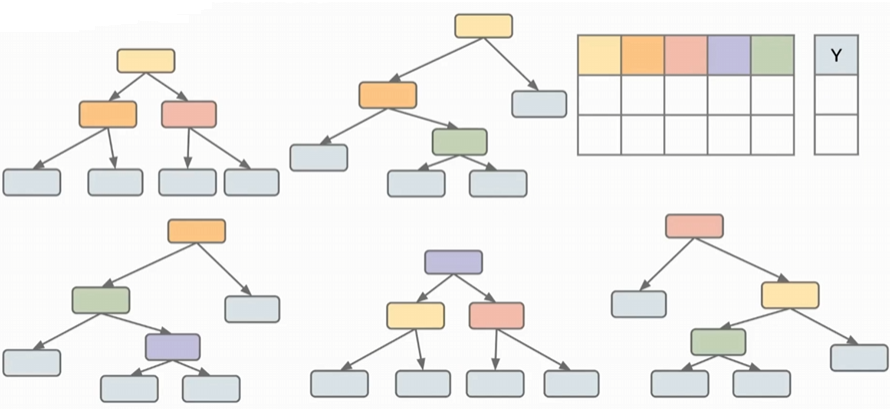

Получаем целый набор(ансамбль) деревьев. Каждое из этих деревьев использует различные разбиения данных. Все признаки участвуют в построении этого набора деревьев.

### Как можно объединить эти деревья в единый ансамбль?

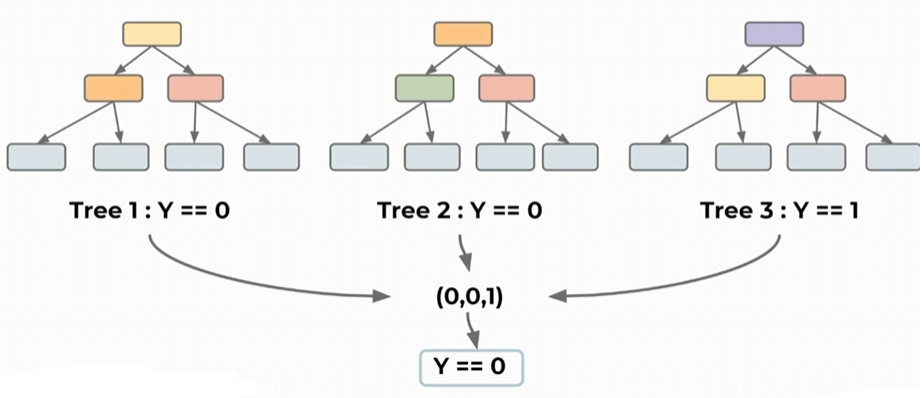

Если на вход к нам поступают какие-то признаки, как можно определить значение целевой переменной y, если деревьев несколько?

Для задачи классификации: мы просто посчитаем количество голосов, которые получает тот или иной класс для целевой переменной. Так на рисунке выше мы просто вернём класс 0 - так как за него проголосовало два дерева из трёх. Также можно указать, насколько случайный лес уверен в своём решении. У нас получается вероятность 2/3 принадлежности к классу 0 и вероятность 1/3 принадлежности к классу 1.

**Случайные леса можно применять и для непрерывных переменных.**

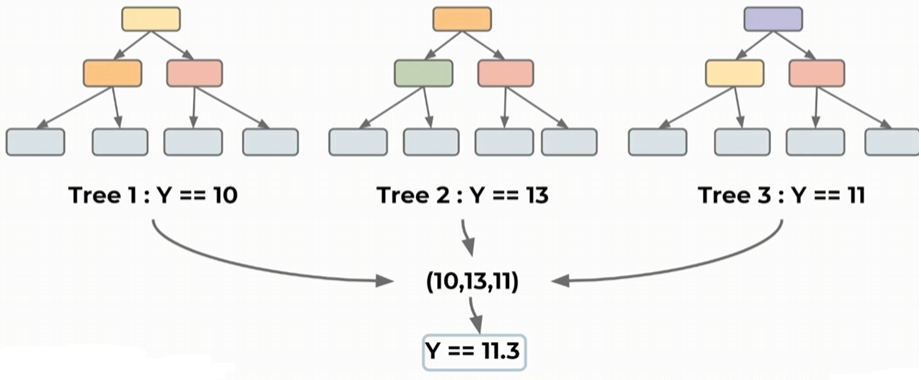

В этом случае мы возьмём все значения, которые возвращает каждое из деревьев и выполним их усреднение.

## Гиперпараметры случайных лесов

### Количество объектов estimator - *сколько деревьев решений должно быть в случайном лесу*

Интуитивно - чем больше деревьев, тем больше возможностей обучения от разных комбинаций признаков. Но появляется два вопроса:
1) Существует ли какой-то предел для количества деревьев?
2) Есть ли опасность переобучения при создании слишком большого количества деревьев?

**Как выбрать количество деревьев по умолчанию:**
* Значение по умолчанию 100
* В публикациях предлагается 64-128 деревьев(всё зависит от количества признаков - чем больше признаков, тем больше нужно деревьев)
* Можно выполнить кросс-валидацию - поиск по сетке
* Нанести ошибки на график, в зависимости от количества деревьев(аналог метода локтя в KNN) - в какой-то момент выигрыш от добавления дополнительных деревьев начинает падать.

#### Представим, что количество деревьев в случайном лесу будет постепенно увеличиваться

Самое минимальное количество равно единице, но такая модель будет работать даже хуже, чем обычное дерево решений - потому что здесь выбираются случайные поднаборы признаков и может получиться так, что будут выбраны не самые важные признаки. Поэтому, если дерево в случайном лесу одно, то ошибка *может быть* достаточно высокой.

Когда количество деревьев увеличивается, можно ожидать, что ошибка будет уменьшаться, потому что будет задействовано большее количество признаков и из данных можно будет извлечь больше информации.

В итоге получится график вида:

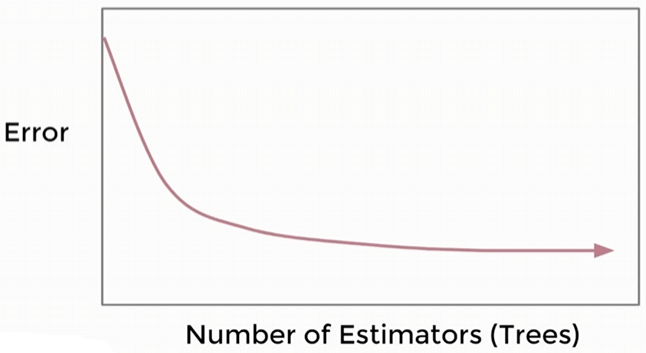

При увеличении количества деревьев ошибка уменьшается, но начиная с какой-то точки это уменьшение становится очень маленьким - при выходе на плато, сколько бы не добавлялось деревьев, ошибка уменьшаться не будет.

Также стоит отметить, что при увеличении количества деревьев график не начинает расти.

#### Начиная с какого-то количества деревьев, можно увидеть следующее:
1) Случайные комбинации признаков не могут извлечь больше информации из данных
    * Новые деревья сильно коррелируют с уже ранее созданными - по стуи возвращают такие же результаты, что и ранее созданные деревья. Но также мы не получаем переобученность модели, просто происходит дублирование полученной ранее информации
2) Случайные комбинации признаков дублируют предыдущие деревья

### Количество признаков - *сколько признаков следует использовать в каждом поднаборе*

Этот гиперпараметр отвечает на вопрос - *сколько признаков следует использовать в каждом поднаборе?*

Обычно применяется $\sqrt{N}$ при общем количестве *N* признаков.  
Для регрессионных задач - $\frac{N}{3}$, которое обычно больше чем $\sqrt{N}$

Этот гиперпараметр имеет смысл подбирать в разных задачах, в качестве начальной точки используя значение $\sqrt{N}$, которое затем будет уточняться при помощи поиска по сетке.

### Параметр Bootstrap samples

Это параметр, который отвечает на вопрос - *использовать ли для построения деревьев поднаборы с возвращением?*

Термин *bootstrapping* обозначает **случайное семплирование с возвращением**. Рассмотрим на примере.

Допустим, имеется набор из пяти букв:

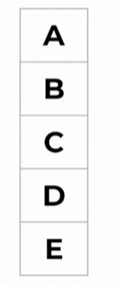

Представим что из такого набора необходимо случайным образом выбрать десять букв:

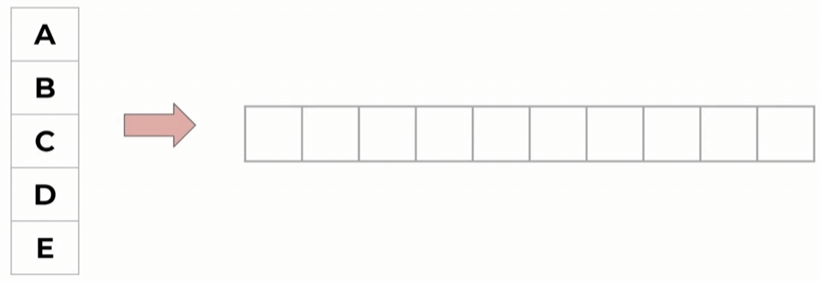

Первым шагом, выбирается случайная буква из пяти букв:

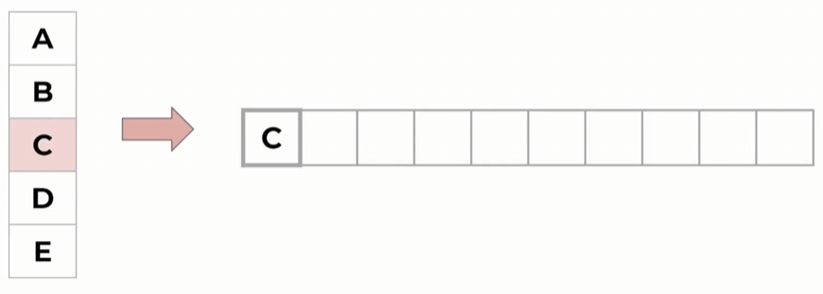

Также стоит отметить, что одну и ту же букву можно выбрать несколько раз:

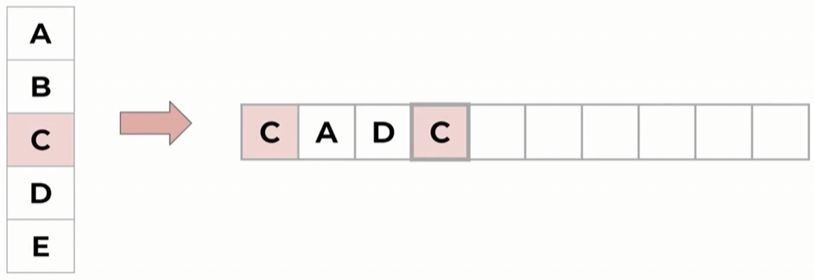

Это как раз и называтеся *bootstrapping* - выбор с возвращением, потому что после того как была выбрана та или иная буква, она была возвращена обратно в набор и её можно выбрать ещё несколько раз:

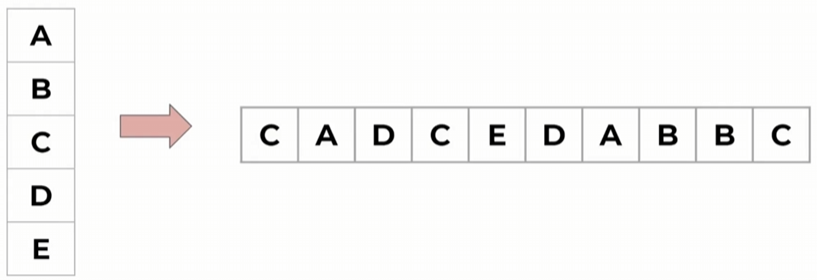

По сути это единственный способ выбрать десять букв из набора в пять букв.

В каждом узле дерева выбираются случайные наборы из признаков, которые позволяют получать более разнообразные наборы из признаков, которые не коррелируют между собой:

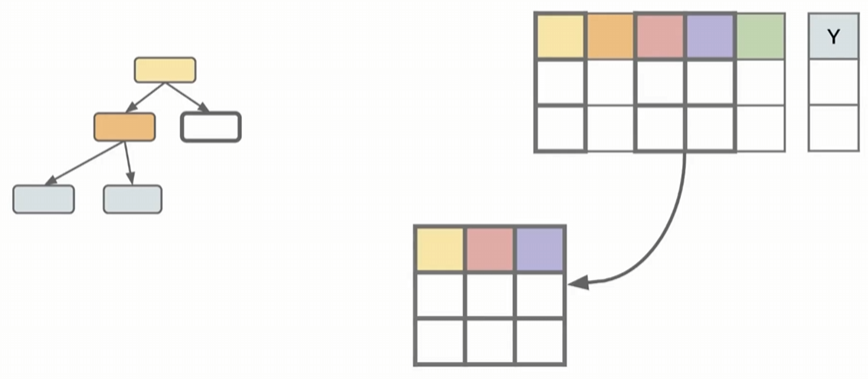

Это также можно считать как *bootstrapping* для признаков.

Но чтобы деревья ещё больше отличались друг от друга - можно выполнить *bootstrapping* не только для признаков, но и для строк. Так, для каждого дерева будет получаться два случайных компонента: 
1) Случайный набор признаков
2) Случайный набор строк

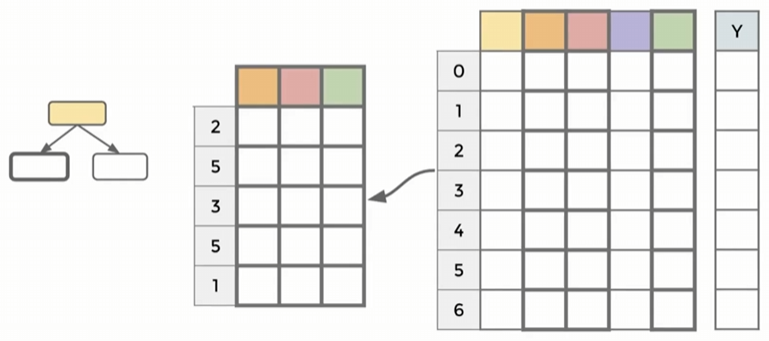

Параметр *bootstrapping* позволяет уменьшить корреляцию между деревьями, поскольку разные деревья обучаются на разных наборах признаков и разных строках данных. Получаются сильно разные деревья, отличающиеся друг от друга, что позволяет модели лучше обобщаться на новые данные, которые она ещё не видела.

Если отключить этот параметр, то при увеличении количества деревьев - будут получаться деревья, которые коррелируют между собой. При включённом параметре такой момент наступит позднее.

### Out of bag errors

Это специальная метрика, для которой параметр отвечает на вопрос - *вычислять ли эту метрику во время обучения модели?*

В случайных лесах используются выборки данных(bootstrapped data) и далее выполняются предсказания на основе агрегатных предсказаний деревьев(aggregated prediction):
 * Для классификции - самый частый класс Y
 * Для регрессии - среднее предсказание Y

Что такое **bagging**?  
Когда мы делаем выборки данных при построении деревьев, то для конкретных деревьев некоторые данные остаются неиспользованными. Если данных достаточно много, то статистически может случиться так, что в конкретном дереве может не участвовать достаточно большое количество данных, вплоть до $\frac{1}{3}$ всех данных.

Например:

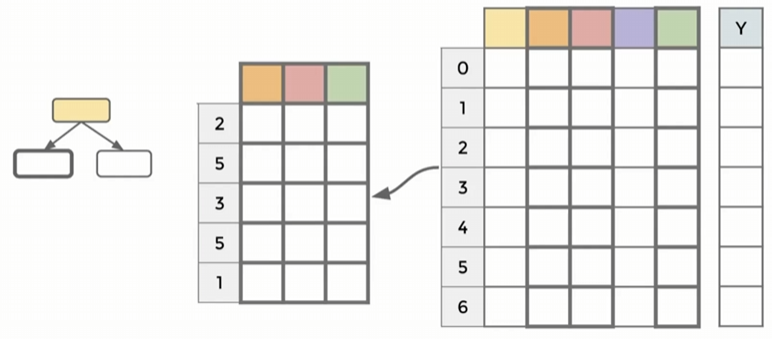

Здесь были взяты только конкретные признаки, и только некоторые строки, на основе которых было построено некоторое дерево:

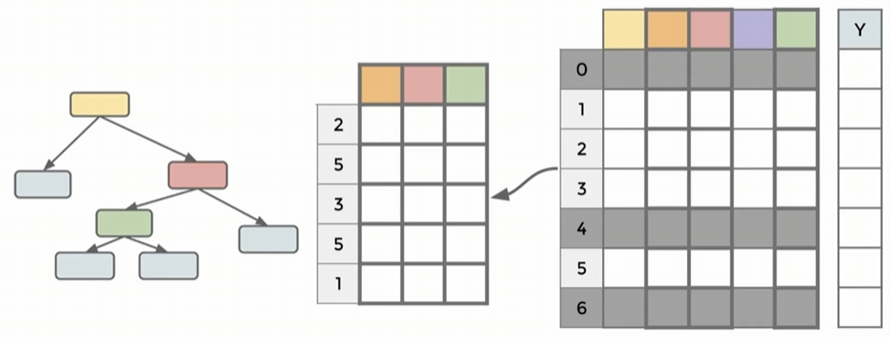

Но если взглянуть на данные, которые применялись для построения этого дерева, то можно заметить, что некоторые строки в исходном наборе данных никак не участвовали в построении этого дерева. В данном примере - это строки 0, 4, 6.

Когда деревьев будет несколько, эти строки смогут поучаствовать в построении других деревьев, но в данном конкретном дереве - эти строки не участвовали. Это означает, что эти данные можно использовать как тестовый набор данных для данного конкретного дерева, потому что оно не видело эти строки в процессе обучения. Такие строки называются **out-of-bag samples**.

На основе таких строк можно вычислить некоторую метрику ошибки, которая по сути будет ошибкой на этом тестовом наборе данных. Это делается следующим образом: 

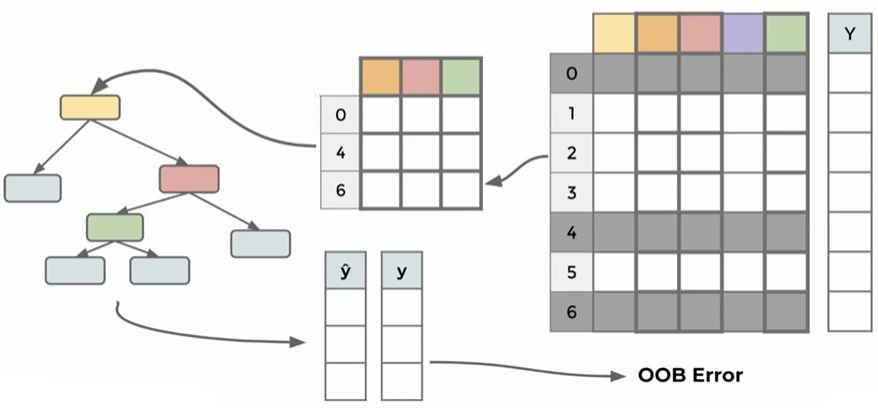

Строки с индексами 0, 4, 6 подаются на вход дереву, а на выходе получаются предсказания модели $\hat{y}$, которые сравниваются с известными значениями $y$. В результате такого сравнения вычисляется метрика ошибки, которая и называется **OOB Error**.

**Важно: эта метрика не может являться полноценной заменой той общей метрике, которая применяется для всего тестового набора данных, потому что здесь мы работаем только с конкретным деревом и конкретными строками в данных, которые это дерево ещё не видело.**

**OOB Score** - это гиперпараметр, который по сути не влияет на процесс обучения модели. Какое бы значение не имел этот гиперпараметр, обучение будет выполняться одинаково, если вычислять данную метрику - обучение будет работать немного дольше, так как необходимо будет вычислить эти ошибки. Он существует отдельно от процесса *bootstrapping*, и нужен для опциональной оценки работы модели. 
Это отличается от параметра **Bootstrap samples**, изменения которого влияет на построение модели.

**OOB Score** применяется только когда используются не все деревья в случайном лесу, поскольку эта метрика вычисляется только для деревьев, которые не использовали данные OOB. Поэтому по умолчанию значение этого гиперпараметра равно False.

---